# Dynamic Programming

### Inductive definitions ... Recursive programs

* Factorial
  - $fact(0) = 1$
  - $fact(n) = n \times fact(n - 1)$

* Insertion sort
  - $isort([]) = []$
  - $isort([x_0, x_1, ..., x_n]) = insert(isort([x_0, x_1, ..., x_{n-1}]), x_n)$

In [ ]:
def fact(n):
  if n <= 0:
    return 1
  
  return n * fact(n - 1)

In [ ]:
def isort(l):
  if l == []:
    return l
  
  return insert(isort(l[:-1]), l[-1])

### Optimal substructure property

* Solution to original problem can be derived by combining solutions to subproblems

* $fact(n-1)$ is a subproblem of $fact(n)$
  - So are $fact(n-2), fact(n-3),...,fact(0)$

* $isort([x_0, x_1, ..., x_{n-1}])$ is a subproblem of $isort([x_0, x_1, ..., x_n])$
  - So is $isort([x_i,...,x_j])$ for any $0 \leq i \lt j \leq n$

### Interval scheduling

* IIT Madras has a special video classroom for delivering online lectures
* Different teachers want to book the classroom
* Slot for instructor $i$ starts at $s(i)$ and finishes at $f(i)$
* Slots may overlap, so not all bookings can be honoured
* Choose a subset of bookings to maximize the number of teachers who get to use the room

**Subproblems**
* Each subset of bookings is a subproblem

**Generic greedy strategy**
* Pick one request from those in contention
* Eliminate bookings in conflict with this choice
* Solve the resulting subproblem

### Subproblems

* Each subset of bookings is a subproblem
* Given $N$ bookings, $2^N$ subproblems
* Greedy strategy looks at only a small fraction of subproblems
  - Each choice rules out a large number of subproblems
  - Greedy strategy needs a proof of optimality

### Weighted Interval Scheduling Problem

* Same scenario as before but each request comes with a weight
  - For instance, the room rent for using the resource
* Revised goal: maximize the total weight of the bookings that are selected
  - Not the same as maximizing the number of bookings selected
* Greedy strategy for unweighted case
  - Select request with earliest finish time
* Not a valid strategy any more

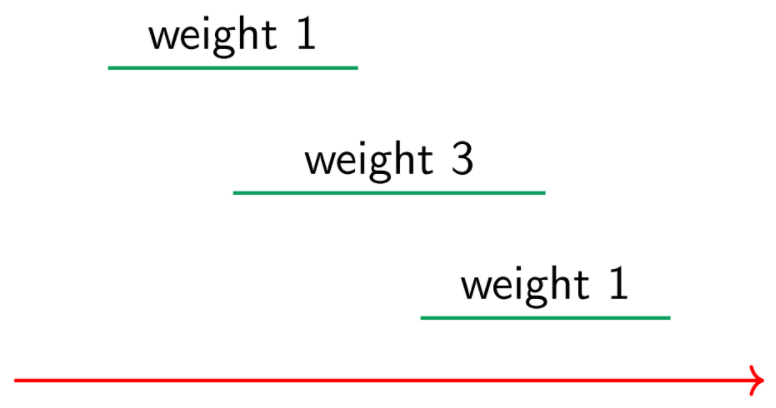

* Search for another greedy strategy that works ...
* ... or look for an inclusive solution that is "obviously" correct

### Weighted Interval Scheduling

* Order by bookings by starting time, $b_1, b_2, ..., b_n$
* Begin with $b_1$
  - Either $b_1$ is part of the optimal solution, or it is not
  - Include $b_1 \implies$ eliminate conflicting requests in $b_2, ..., b_n$ and solve resulting subproblem
  - Exclude $b_1 \implies$ solve subproblem $b_2,..., b_n$
  - Evaluate both options, choose the maximum

* Inductive solution considers all options
  - For each $b_j$, optimal solution either has $b_j$ or does not
  - For $b_1$, we have explicitly checked both cases
  - If $b_2$ is not in conflict with $b_1$, it will be considered in both subproblems with and without $b_1$
  - If $b_2$ is in conflict with $b_1$, it will be considered in the subproblem where $b_1$ is excluded

### The challenge

* $b_1$ is in conflict with $b_2$, but both are compatible with $b_3, b_4, ..., b_n$
  - Choose $b_1 \implies$ subproblem $b_3, ..., b_n$
  - Exclude $b_1 \implies$ subproblem $b_2, ... b_n$
  - Next stage
    * Choose/exclude $b_2$
    * Both choices result in $b_3, ..., b_n$, same subproblem
* Inductive solution generates same subproblem at different stages
* Naive recursion implementation evaluates each instance of subproblem from scratch
* Can we avoid this wasteful recomputation
* Memoization and Dynamic Programming?